# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath = "C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/housing.csv"

# Using pandas library it enables us to read the csv file and store as a dataframe

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
data.shape

(20640, 9)

# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset

In [5]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used

In [6]:
data.dtypes

MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

# Based on all of the features if we assume to find clustering based on MEDIAN HOUSE VALUE, it will be most suitable to use LATITUDE, LONGITUDE to check where majority of the expensive houses are located and based on what locality

In [7]:
home_data = pd.read_csv(filepath, usecols = ['Longitude', 'Latitude', 'MedHouseVal'])
home_data.head()

,Latitude,Longitude,MedHouseVal
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422


# 2D graph to visualize based on LATITUDE and LONGITUDE how MEDIAN HOUSE VALUE is depicted... Initially we are plotting 5 different clusters without accounting for K value

<Axes: xlabel='Longitude', ylabel='Latitude'>

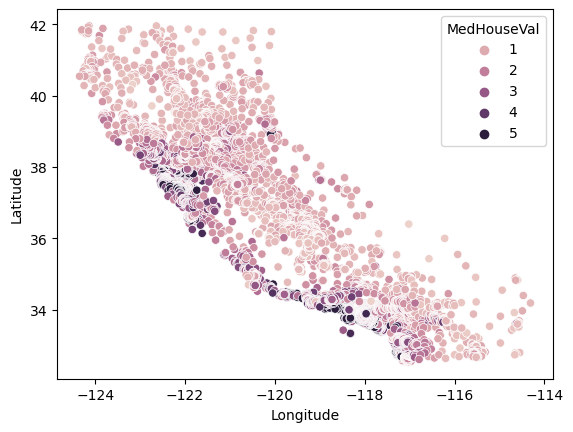

In [8]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

# Normalizing the values for better processing

In [9]:
from sklearn import preprocessing

X_norm = preprocessing.normalize(home_data[['Latitude', 'Longitude']])

# Taking a range of K values from 2 to 12 to identify what is the optimal no. of clusters... Model is trained subsequently and Silhouette score is calculated for the given range of K values

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 12)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_norm, model.labels_, metric='euclidean'))

In [11]:
fits, score

([KMeans(n_clusters=2, n_init='auto', random_state=0),
  KMeans(n_clusters=3, n_init='auto', random_state=0),
  KMeans(n_clusters=4, n_init='auto', random_state=0),
  KMeans(n_clusters=5, n_init='auto', random_state=0),
  KMeans(n_clusters=6, n_init='auto', random_state=0),
  KMeans(n_clusters=7, n_init='auto', random_state=0),
  KMeans(n_init='auto', random_state=0),
  KMeans(n_clusters=9, n_init='auto', random_state=0),
  KMeans(n_clusters=10, n_init='auto', random_state=0),
  KMeans(n_clusters=11, n_init='auto', random_state=0)],
 [0.7761558886704949,
  0.7499115323392396,
  0.6724123364917434,
  0.6517580643840095,
  0.5669651939599707,
  0.5738918466635289,
  0.569225167097545,
  0.5693790460455412,
  0.5536007384438096,
  0.56821283329738])

# Plotting the Silhouette Graph and the best possible K value obtained is 3, but it has to correlated with Elbow Point Graph for confirmation

<Axes: >

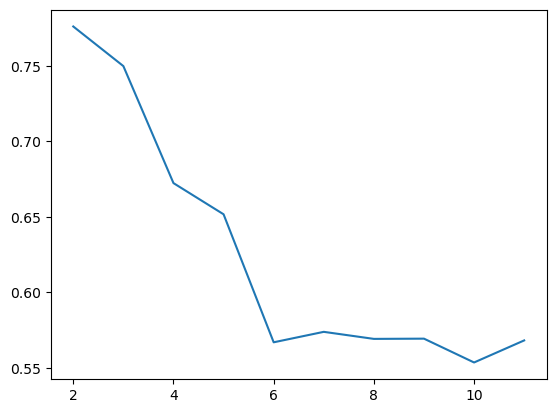

In [12]:
sns.lineplot(x = K, y = score)

# For finding the Elbow point graph, we find WCSS (Within Cluster Sum of Squares) and subsequently Elbow Point Graph where again optimal K value post which graph has almost same slope is 3

In [13]:
# finding wcss value for different number of clusters
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

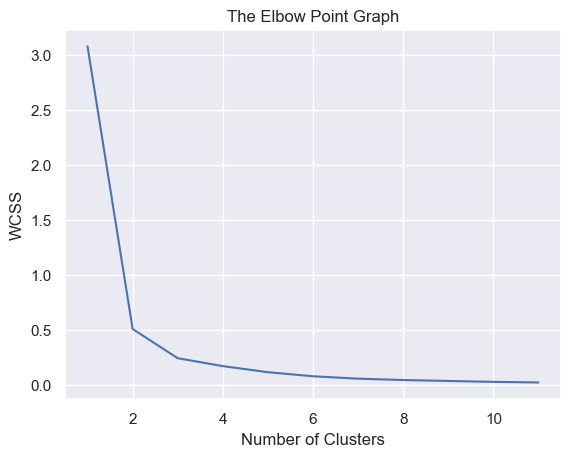

In [15]:
import matplotlib.pyplot as plt
# plot an elbow graph

sns.set()
plt.plot(range(1,12), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# So based on optimal value of K = 2, we train the KMeans Clustering model, giving it normalized training set of values

In [16]:
# import Kmeans from sklearn

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_norm)

KMeans(n_clusters=2, n_init='auto', random_state=0)

# We visualize the 2D plot based on 2 clusters as the model is trained on

<Axes: xlabel='Longitude', ylabel='Latitude'>

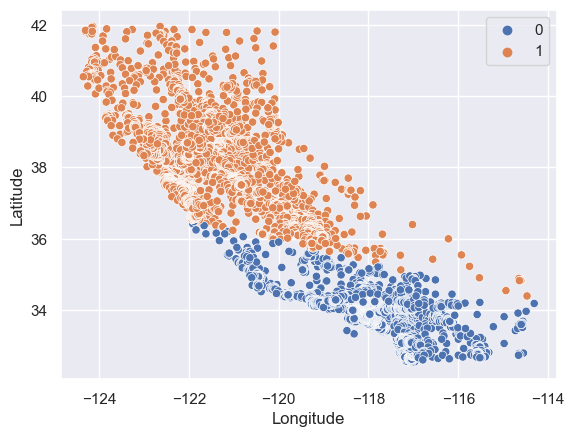

In [17]:
sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

# Box Plot takes in parameters and creates a box plot that shows the distribution of the MEDIAN HOUSE VALUE for each cluster generated by the k-means algorithm

<Axes: ylabel='MedHouseVal'>

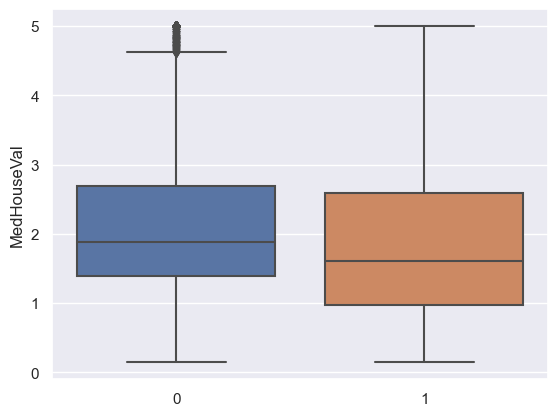

In [18]:
sns.boxplot(x = kmeans.labels_, y = home_data['MedHouseVal'])

# Finally, we check the Silhouette score which results the conclusion of KMeans Clustering as that is the optimal accuracy based on chosen values

In [19]:
silhouette_score(X_norm, kmeans.labels_, metric='euclidean')

0.7761558886704949

In [20]:
array = home_data[['Latitude', 'Longitude']].values

In [21]:
array

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

# The main visualization in single-link and complete-link is the fact that distance between closest points of each cluster is calculated in single-link

In [22]:
import numpy as np

def find_closest_points(X, labels):
    clusters = {i: X[labels == i] for i in range(np.max(labels) + 1)}

    min_distance = np.inf
    closest_points = (None, None)

    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            for point1 in clusters[i]:
                for point2 in clusters[j]:
                    distance = np.linalg.norm(point1 - point2)
                    if distance < min_distance:
                        min_distance = distance
                        closest_points = (point1, point2)

    return closest_points

# Example usage:
closest_points = find_closest_points(array, kmeans.labels_)

# For complete-link the distance between furthest points of each cluster is calculated for clustering analysis

In [23]:
def find_furthest_points(X, labels):
    clusters = {i: X[labels == i] for i in range(np.max(labels) + 1)}

    max_distance = -np.inf
    furthest_points = (None, None)

    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            for point1 in clusters[i]:
                for point2 in clusters[j]:
                    distance = np.linalg.norm(point1 - point2)
                    if distance > max_distance:
                        max_distance = distance
                        furthest_points = (point1, point2)

    return furthest_points

# Example usage:
furthest_points = find_furthest_points(array, kmeans.labels_)

# Now we prefer to visualize how clustering could take place when we have 2 clusters formed, and how furthest points and closest points are plotted and their distance represented by a line

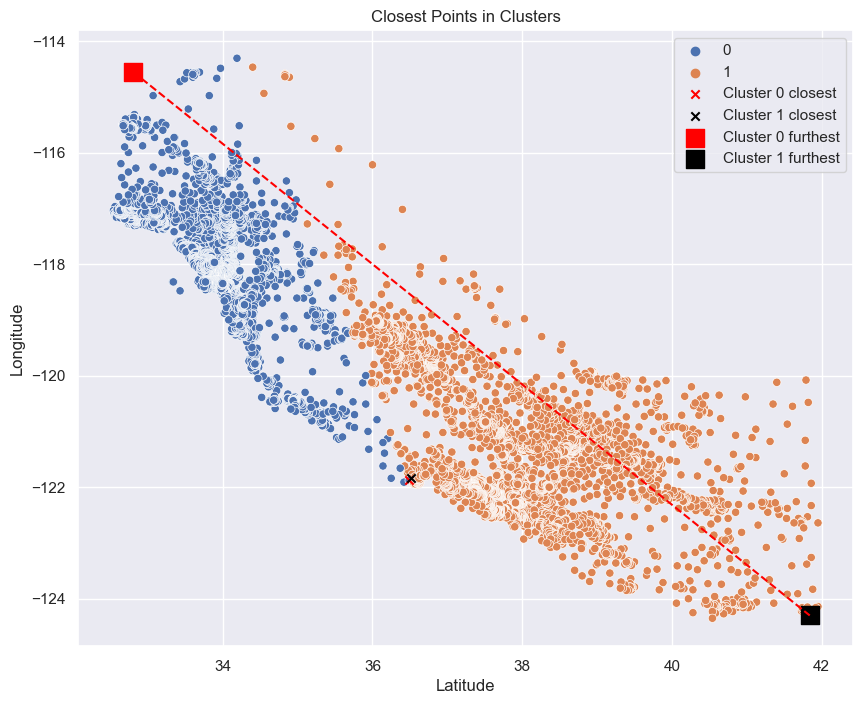

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Plotting
sns.scatterplot(data=home_data, x='Latitude', y='Longitude', hue=kmeans.labels_)
plt.scatter(closest_points[0][0], closest_points[0][1], color='red', marker='x', label="Cluster 0 closest")
plt.scatter(closest_points[1][0], closest_points[1][1], color='black', marker='x', label="Cluster 1 closest")
plt.scatter(furthest_points[0][0], furthest_points[0][1], color='red', marker='s', s=150, label="Cluster 0 furthest")
plt.scatter(furthest_points[1][0], furthest_points[1][1], color='black', marker='s', s=150, label="Cluster 1 furthest")

plt.plot([furthest_points[0][0], furthest_points[1][0]], [furthest_points[0][1], furthest_points[1][1]], '--', color='red')

plt.title('Closest Points in Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Since the closest points plotted are not visible and neither the line separating them we shift the x and y ranges, thus to see the actual visualized plot of the points and how much far are they

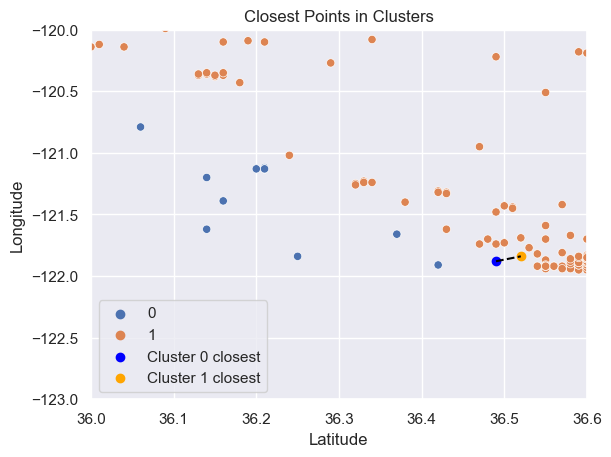

In [31]:
# Plotting
sns.scatterplot(data=home_data, x='Latitude', y='Longitude', hue=kmeans.labels_)
plt.scatter(closest_points[0][0], closest_points[0][1], color='blue', marker='o', label="Cluster 0 closest")
plt.scatter(closest_points[1][0], closest_points[1][1], color='orange', marker='o', label="Cluster 1 closest")

plt.plot([closest_points[0][0], closest_points[1][0]], [closest_points[0][1], closest_points[1][1]], '--', color='black')

# Adjust x-axis and y-axis limits to focus on furthest points
plt.xlim(36,36.6)
plt.ylim(-123,-120)

plt.title('Closest Points in Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# We run the single-link and complete-link dendograms where clustering takes place through Hierarchial Agglomerative way

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_link = linkage(X_norm, method="complete", metric="euclidean")
single_link = linkage(X_norm, method="single", metric="euclidean")

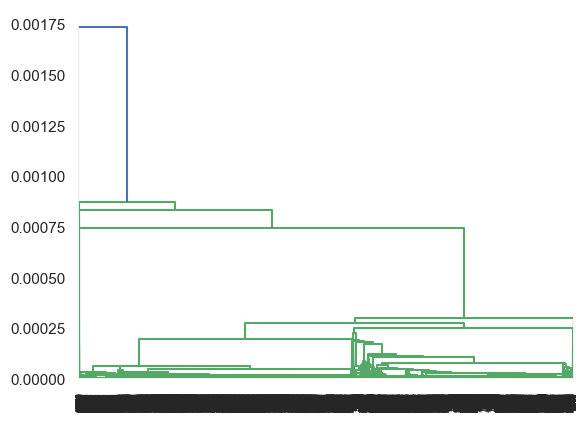

In [26]:
dendrogram(single_link)
plt.show()

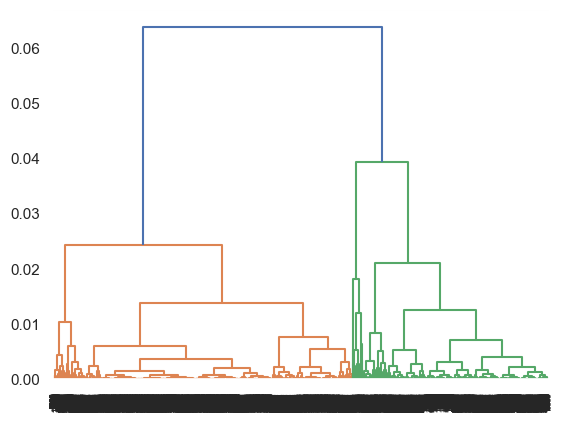

In [27]:
dendrogram(complete_link)
plt.show()

# Final Interpretation

The Housing dataset which contains 20640 rows and 9 columns is used for Hierarchial Clustering model. The dataset is used as a whole but only specific features are interlinked to the clustering analysis. Since no empty or null values are present in the dataset, we move onto depicting the set of features for graphical representation too. Since focus is largely towards clustering and finding optimal number of clusters and its representation there is no requirement on splitting the dataset into training and testing parts. Elbow Point graph and Silhouette graph are both visualized to confirm the optimal K value, i.e., clusters that need to be found. The single-link and complete-link are plotted correspondingly using scatterplot and dendograms for visualization purposes. The model has lesser Silhouette score value because we included one additional feature owing to Longitude and Latitude, else the score could've been slightly better.